# Predicting Group Responsible for a Terrorist Act



# Work Flow:

1.Problem Statement

2.Libraray imports

1.Loading Data, cleaning and formatting

2.Exploratory data analysis

3.Feature selection

4.Split into training and test set

5.Model training and evaluation

6.Model Selection

7.Evaluate model on test set

8.Model interpretation

8.Draw conclusions 

# Problem Statement

Global Terrorism Database (GTD) is an open-source database including information on terrorist events around the world from 1970 through 1985. Some portion of the attacks have not been attributed to a particular terrorist group. Use attack type, weapons used, description of the attack, etc. to build a model that can predict what group may have been responsible for a terrorist attack.

The target feature is **group name**, and it is identified in the feature set as **gname**

* This is a supervised learning since the target/label and features have been provided in data set
* This is also a classification problem since the label is categorical

# Library Imports

Standard libraries that was used in this project

In [1]:
# Ensure python 2 & 3 compatibility  
from __future__ import print_function

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np


# Display up to 135 columns of a dataframe
pd.set_option('display.max_columns', 135)

# Matplotlib  for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
#from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import time

np.random.seed(42) # To make notebooks output identical at every run

import warnings # this module inores any warning output
warnings.filterwarnings('ignore')

# Load Data, Cleaning, and Formatting

### Loading Data
Data will be loaded into a pandas dataframe which offers a spreadsheet like display and manipulation of data

In [2]:
import os  # OS Allows for interfacing with operating system that pyhon is running on
os.chdir('/Users/tosinbosede/Downloads') # Set the working directory

GTD = 'globalterrorismdb_0718dist.xlsx' # assign variable 'GTD' to the data file name
data = pd.read_excel(GTD)

#data.info()

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaT,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaT,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaT,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

* The first 5 and last 5 rows in above dataframe indicates that data ranges from 1970-2017 in the **iyear** attribute. The **iyear** column denotes incident, or attack year.

* It can also be observed that data contains both numerical and categorical attributes

* Some columns also have missing values as indicated by **NAN** in some rows 

In [5]:
#names =list(data)
#print(names)

### Extracting subset of data (1970-1985)

In [6]:
Data_sub = data[data.iyear<1991] # Extracting subset of data from 1970-1991
#df.tail(3)


* Using the info( ) function can give us the data types in Data_sub, and the data frame dimensions

* Using the descibe( ) function gives us the general statics of the numerical features in Data_sub

In [7]:
Data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44961 entries, 0 to 44961
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(55), int64(22), object(57)
memory usage: 46.7+ MB


Data Summary:

* Data_sub has 135 columns and 26986 rows

* The columns include 1 datetime64, 55 float64, 22 int64, and 57 object 

In [8]:
Data_sub.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,4.496100e+04,44961.000000,44961.000000,44961.000000,44961.000000,44961.000000,44961.000000,42527.000000,4.252700e+04,44961.000000,44961.000000,44961.000000,44961.000000,44961.000000,44961.000000,7454.000000,44961.000000,44961.000000,44961.000000,44961.000000,40.000000,2.000000,44961.000000,42942.000000,44753.000000,494.000000,368.000000,446.000000,78.000000,57.000000,76.000000,44961.000000,113.000000,11.000000,44961.000000,6702.000000,1209.000000,1213.000000,310.000000,19.000000,18.000000,8.0,8.000000,46.000000,44961.000000,38029.000000,2680.000000,2234.000000,357.000000,311.000000,66.000000,62.000000,39272.000000,2820.000000,2765.000000,37444.000000,2773.000000,2486.000000,44961.000000,15947.000000,8.873000e+03,44787.000000,2829.000000,2829.000000,885.000000,643.000000,44612.000000,5.310000e+02,1.0,1.180000e+02,2.0,1090.000000,823.000000,44961.000000,44961.000000,44961.000000,44961.000000
mean,1.983461e+11,1983.395854,6.412669,15.332377,0.016548,153.605703,5.256267,16.869177,-2.050400e+03,1.411623,0.029203,0.991904,0.992349,0.853117,-1.289362,1.156024,0.095349,0.920620,0.000845,3.001557,4.650000,3.000000,7.661751,44.684551,129.533104,9.139676,48.538043,172.816143,7.179487,45.982456,144.802632,0.048442,0.185841,0.090909,0.001246,5.672337,-73.885856,-0.028854,4.516129,0.947368,5.611111,1.0,8.000000,0.195652,6.427593,10.115596,6.422761,9.897941,6.605042,9.919614,6.287879,10.467742,2.099944,0.300000,0.529114,1.684329,0.600793,0.061142,0.717577,3.411551,2.295230e+05,0.063166,1.015553,0.075645,18.491525,32.842924,0.012082,3.405927e+06,20000.0,1.072952e+06,0.0,3.009174,8.492102,-3.146838,-3.101377,0.151442,-2.436601
std,4.996947e+08,4.996708,3.378415,8.833137,0.127570,139.211328,3.167420,25.292244,4.179302e+05,1.093688,0.168377,0.089613,0.087136,0.353993,3.405738,0.462979,0.293700,0.270334,0.029060,1.853617,2.465662,1.414214,6.768174,33.015924,73.070366,6.801945,29.611631,118.016347,6.070460,29.586732,82.076715,0.214701,0.390711,0.301511,0.035270,74.568538,43.652415,1.670949,3.152756,0.229416,3.821593,0.0,2.828427,0.401085,2.233861,7.130262,1.812405,7.183935,2.143262,7.903652,1.516729,7.787585,8.628720,5.853303,2.818490,10.271509,14.504951,0.353600,0.631537,0.518442,6.102794e+06,0.243263,407.178624,3.930433,133.456612,157.540991,0.109253,4.379086e+07,NaN,4.226059e+06,0.0,1.348368,32.841241,4.364953,4.418650,0.718927,4.318126
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.980062e+11,1980.000000,4.000000,8.000000,0.000000,61.000000,3.000000,4.667128,-7.697846e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0

This a summary of the statistical properties of the numerical features in the df dataframe.

The standard deviation (std) shows how dispersed the values are under each column

In the case of the **longitude** feature, the standard deviation is quite high compated to the mean. This signifies the values may be very dispersed/skewed. This will be investigated in the exploratory data analysis section 





### Missing values

In [9]:
# A function for identifying mising values in each column and presenting them in table format
def msv_table():
    msv = Data_sub.isnull().sum()  # sum of missing values
    msv_perc = 100*Data_sub.isnull().sum()/len(Data_sub) # percentage of missing values
    #Create a table of columns with number of missing values, and percentage of missing values per column
    mis_value_table = pd.concat([msv, msv_perc], axis =1)
    #Rename columns of created table
    mis_value_table_rename = mis_value_table.rename(columns = {0:'missing values', 1:'Percentage of missing values (%)'})
    #Arrange missing the data in descending order, shoing the largest first 
    mis_value_table_rename = mis_value_table_rename[
            mis_value_table_rename.iloc[:,1] != 0].sort_values(
        'Percentage of missing values (%)', ascending=False).round(1)
    #Summary of missing values statistics
    print ("The dataframe contains " + str(Data_sub.shape[1]) + " columns\n,"      
            " and there are " + str(mis_value_table_rename.shape[0]) +
              " columns that have missing values.")
    #return mis_value_table_rename data frame
    return mis_value_table_rename
msv_table()

The dataframe contains 135 columns
, and there are 101 columns that have missing values.


,missing values,Percentage of missing values (%)
gsubname3,44961,100.0
gsubname2,44960,100.0
ransomamtus,44960,100.0
ransompaidus,44959,100.0
attacktype3,44959,100.0
attacktype3_txt,44959,100.0
ransomnote,44955,100.0
claimmode3_txt,44953,100.0
claimmode3,44953,100.0
claim3,44953,100.0


Generally, caution must be taken when dropping features from the data frame because you do not know how important
they are at this stage. However, you wouldn't want to spend a lot of time imputing missing data in a column with lots of missing data, this may even end up modifying the data set too much.

While there are so many topics on how to drop features, in this project I am using I am making a decision to remove columns with very high percentage of missing values in this case, missing values greater than 35%. Rest of missing values will be imputed.

In [10]:
#Droing missng values > 35%
df_missing = msv_table();
missing_columns = list(df_missing[df_missing['Percentage of missing values (%)'] > 35].index)
print('I am removing %d columns.' % len(missing_columns))

The dataframe contains 135 columns
, and there are 101 columns that have missing values.
I am removing 86 columns.


In [11]:
#Drop the 86 columns from the df dataframe
Data_sub1 = Data_sub.drop(columns=list(missing_columns))

In [12]:
Data_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44961 entries, 0 to 44961
Data columns (total 49 columns):
eventid             44961 non-null int64
iyear               44961 non-null int64
imonth              44961 non-null int64
iday                44961 non-null int64
extended            44961 non-null int64
country             44961 non-null int64
country_txt         44961 non-null object
region              44961 non-null int64
region_txt          44961 non-null object
provstate           44787 non-null object
city                44961 non-null object
latitude            42527 non-null float64
longitude           42527 non-null float64
specificity         44961 non-null float64
vicinity            44961 non-null int64
crit1               44961 non-null int64
crit2               44961 non-null int64
crit3               44961 non-null int64
doubtterr           44961 non-null float64
multiple            44961 non-null float64
success             44961 non-null int64
suicide         

**After cleaning, the columns have been reduced from 135 to 49**

# Exploratory data analysis

Single variable plots (histograms) to explore selected features. I am plotting histograms from the following columns: 'iyear', 'eventid','iday', 'imonth', 'longitude', 'latitude', 'nkill', 'country'. 

Based on information on collected data, and eventid, is composed of the year, month,  and day.
I would like to see if these plots are similar in any way.

I would also like to see the similarity/difference in region and country.

I would also like to plot a scatter plot of the longitude, and latitude to see if there is any trend.

In [13]:
Data_sub['gname'].head(20)

0                                 MANO-D
1     23rd of September Communist League
2                                Unknown
3                                Unknown
4                                Unknown
5                     Black Nationalists
6                    Tupamaros (Uruguay)
7                                Unknown
8                        New Year's Gang
9                        New Year's Gang
10       Weather Underground, Weathermen
11                   Left-Wing Militants
12                               Unknown
13                   Left-Wing Militants
14         Armed Commandos of Liberation
15                             Commune 1
16             Eritrean Liberation Front
17                    Black Nationalists
18                              Strikers
19                    Black Nationalists
Name: gname, dtype: object

**So the target/label column is multiclass**

### 1 Variable Plots

In [14]:
# Extractig a subset of the numerical column to do exploratory data analysis

Num_sub=Data_sub1[['iyear', 'eventid', 'iday', 'imonth', 'nkill', 'longitude', 'latitude', 'nwound', 'region']]


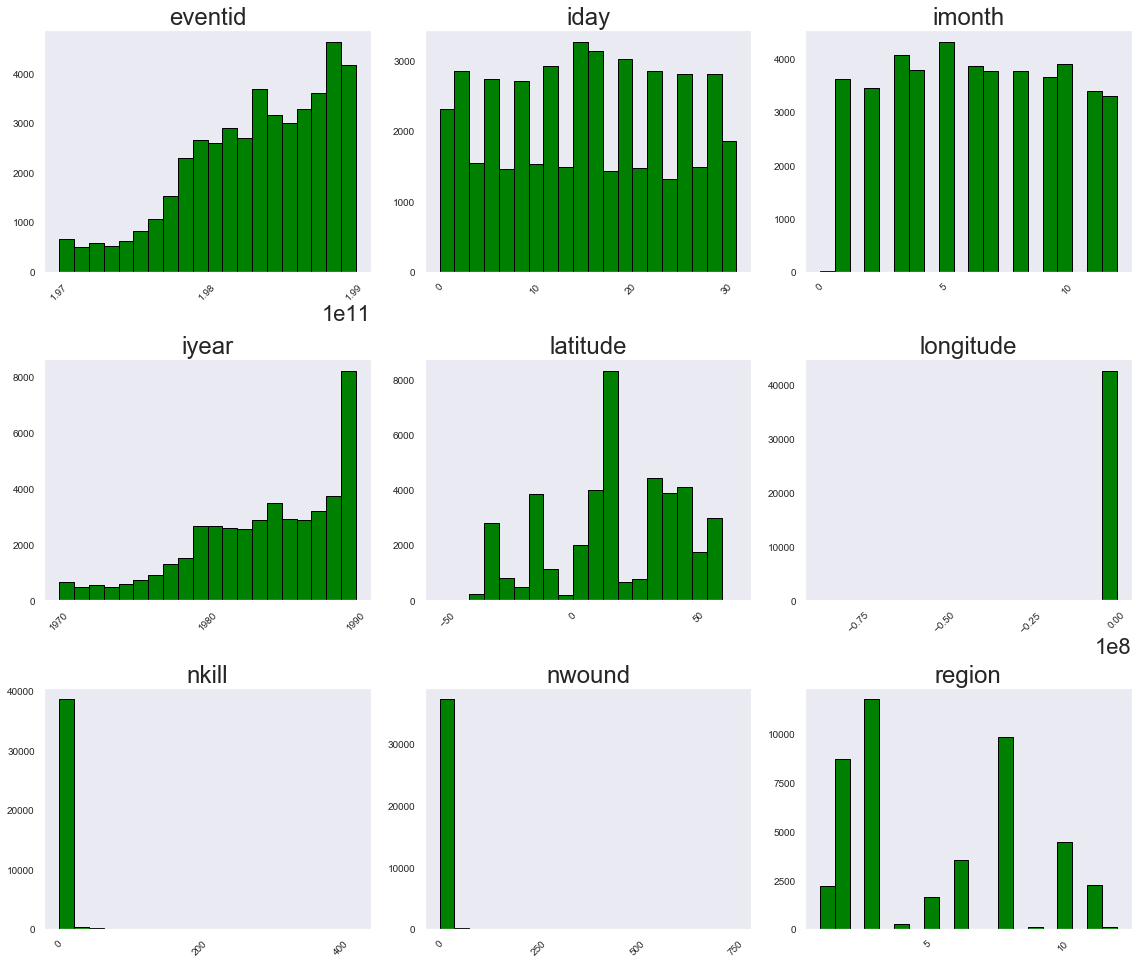

In [15]:
fig=Num_sub.hist(bins=20,
                 color='green',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(8,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 2, 1.5))


* The 'eventid' and 'iyear' histograms show a similarity in distribution i.e., skewed right.
  They have to be investigated to see if they are redundant, and determine if it is necessary to get rid of one     of the features.
* The distribtion of the number wounded (nwound) and number killed (nkill)

* The distribution in the 'imonth' feature seems to be quit uniform, i.e, the frequencies are identical.


* The histograms also reveal that attributes have different scales. 


* There is something strange about the longitude histogram, it only shows one high frequency. Is an indication     that the longitude data may be highly skewed and has outliers. The outlies will be dealt with in the next         steps.

In [16]:
# #Simpler way of removing outliers if all the columns are numerical
# #It can still be used except that, numerical columns need to be separated from the categorical columns
#from scipy import stats
#Data_sub1=Data_sub1[(np.abs(stats.zscore(Data_sub1)) < 3).all(axis=1)]

### Removing outliers

We are going to generally remove outlies in the df dataframe, this will enable a much better predictive model

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured (wikipedia).

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers (towardsdatascience.com: Natasha Sharma)

In [17]:
# Calculate first and third quartile on the numerical training data
first_quartile = Data_sub1['longitude'].describe()['25%']
third_quartile = Data_sub1['longitude'].describe()['75%']

# Interquartile range
iq_range = third_quartile - first_quartile


# Remove outliers
Data_sub1 = Data_sub1[(Data_sub1['longitude'] > (first_quartile - 3 * iq_range)) &
            (Data_sub1['longitude'] < (third_quartile + 3 * iq_range))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f6758d0>]],
      dtype=object)

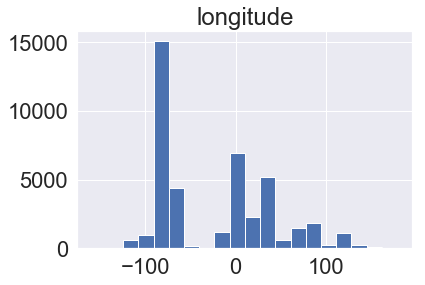

In [18]:
# Replotting the longitude histogram
Data_sub1.hist(column='longitude', bins=20)

* Ditribution of the longitude feature after removing the outliers now looks much better than before. 

* longitude data looks more normally distributed than before 

In [19]:
#Calculate first and third quartile on the numerical training data
first_quartile = Data_sub1['nkill'].describe()['25%']
third_quartile = Data_sub1['nkill'].describe()['75%']

# Interquartile range
iq_range = third_quartile - first_quartile


# Remove outliers
Data_sub1 = Data_sub1[(Data_sub1['nkill'] > (first_quartile - 3 * iq_range)) &
            (Data_sub1['nkill'] < (third_quartile + 3 * iq_range))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x142bbf5c0>]],
      dtype=object)

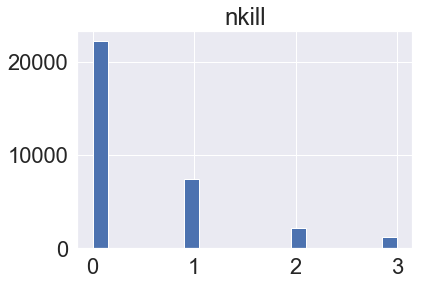

In [20]:
# Replotting the longitude histogram
Data_sub1.hist(column='nkill', bins=20)


In [21]:
#Calculate first and third quartile on the numerical training data
#first_quartile = Data_sub1['nwound'].describe()['25%']
#third_quartile = Data_sub1['nwound'].describe()['75%']

#Interquartile range
#iq_range = third_quartile - first_quartile


# Remove outliers
#Data_sub1 = Data_sub1[(Data_sub1['nwound'] > (first_quartile - 3 * iq_range)) &
#            (Data_sub1['nwound'] < (third_quartile + 3 * iq_range))]

In [22]:
# Replotting the longitude histogram
#Data_sub1.hist(column='nwound', bins=20)

### 4 Variable Plot

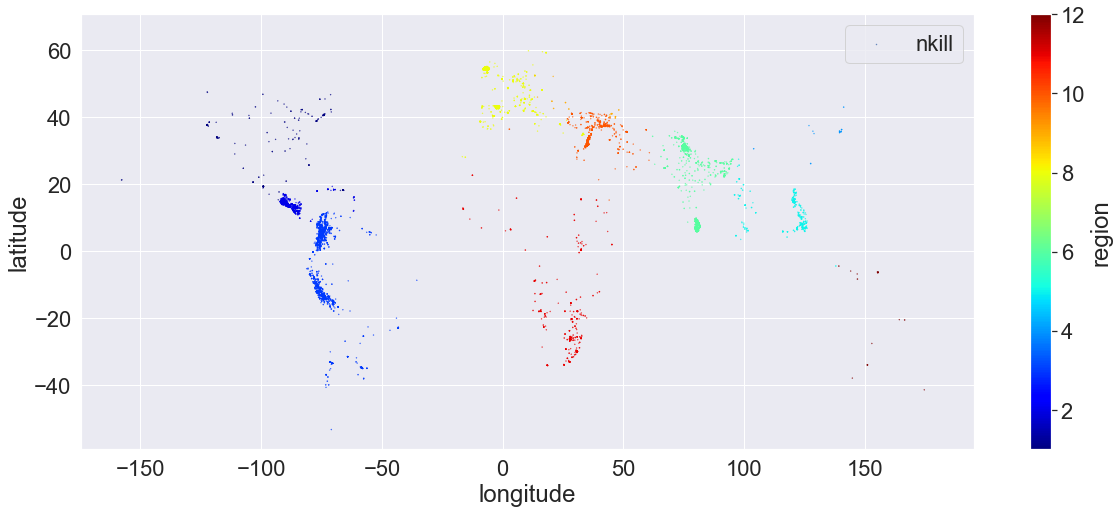

In [21]:
Data_sub1.plot(kind="scatter", x="longitude", y="latitude",
             alpha=1, figsize=(20,8), s=Data_sub1["nkill"]/8, label="nkill",
    c="region", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

A density scatter plot of the longitude and the latitude, with region denoted by color code, and the number of people killed  per attack denoted by the radius size 'nkill' in different regions of the world

### 2 Variable Plot

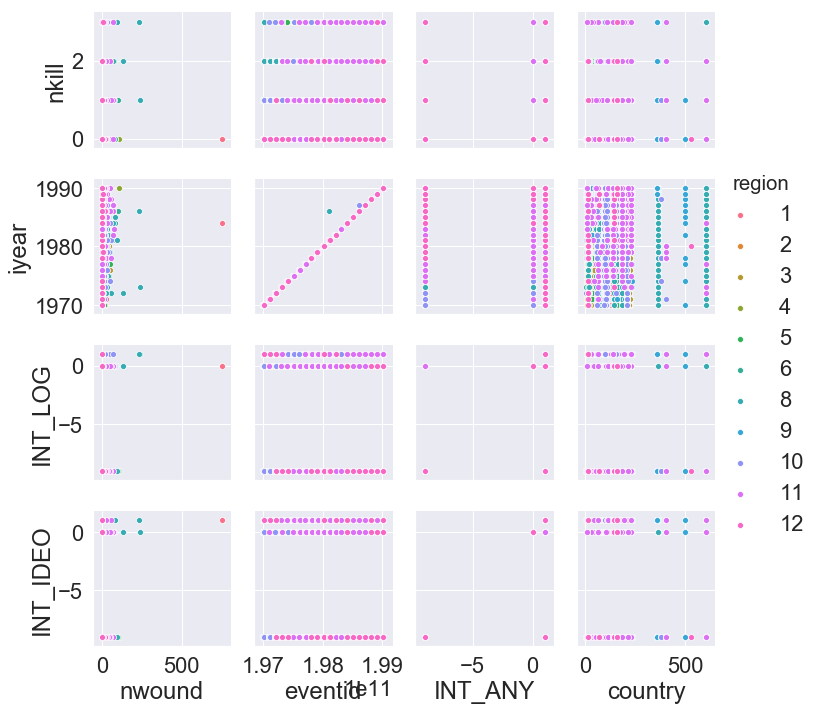

In [22]:

sns.pairplot(Data_sub1, hue='region', x_vars=['nwound', 'eventid', 'INT_ANY', 'country'], y_vars= ['nkill', 'iyear','INT_LOG', 'INT_IDEO'])


* There is a very high correlaton between incident year(**iyear**) and event-ID (**eventid**).

* This is because the metadata sugests that the eventid is derived from the iyear 

### Extract target column

In [23]:
#Extracting the target column
Y=Data_sub1['gname']

#Factorize classes in Y
labels,unique = pd.factorize(Y)
Y = pd.DataFrame(labels)
#Rename the target column as Group_Name
Y.columns=['Group_Name']

# Drop target column from Data_sub1 dataframe
features = Data_sub1.drop(['gname'], axis = 1)

### Removing redundant features

In [24]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33026 entries, 0 to 44961
Data columns (total 48 columns):
eventid             33026 non-null int64
iyear               33026 non-null int64
imonth              33026 non-null int64
iday                33026 non-null int64
extended            33026 non-null int64
country             33026 non-null int64
country_txt         33026 non-null object
region              33026 non-null int64
region_txt          33026 non-null object
provstate           32901 non-null object
city                33026 non-null object
latitude            33026 non-null float64
longitude           33026 non-null float64
specificity         33026 non-null float64
vicinity            33026 non-null int64
crit1               33026 non-null int64
crit2               33026 non-null int64
crit3               33026 non-null int64
doubtterr           33026 non-null float64
multiple            33026 non-null float64
success             33026 non-null int64
suicide         

* Inspecting the 'features' data types above, some of the features are redundant. There are numerical attributes   with their equivalent categroical attributes eg. weapsubtype1:weapsubtype_txt, weaptype1:weaptype1_txt,           natltyl:natlty1_txt.

* These are redundant representation of the same features, their categorical equivalent will have to be removed

In [25]:
#Redundant features are being removed, and the resulting dataframe is assigned to features_new variable
features_new = features.drop(['weaptype1_txt','weapsubtype1_txt','natlty1_txt','targsubtype1_txt','targtype1_txt','attacktype1_txt','region_txt','country_txt'], axis=1)

In [26]:
features_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33026 entries, 0 to 44961
Data columns (total 40 columns):
eventid         33026 non-null int64
iyear           33026 non-null int64
imonth          33026 non-null int64
iday            33026 non-null int64
extended        33026 non-null int64
country         33026 non-null int64
region          33026 non-null int64
provstate       32901 non-null object
city            33026 non-null object
latitude        33026 non-null float64
longitude       33026 non-null float64
specificity     33026 non-null float64
vicinity        33026 non-null int64
crit1           33026 non-null int64
crit2           33026 non-null int64
crit3           33026 non-null int64
doubtterr       33026 non-null float64
multiple        33026 non-null float64
success         33026 non-null int64
suicide         33026 non-null int64
attacktype1     33026 non-null int64
targtype1       33026 non-null int64
targsubtype1    31543 non-null float64
target1         32768 non-

* So the final dataframe has 35 numerical features, and 5 categorical features. .

* Based on dataframe information above, there are still missing observations, or rows. This will be dealt with by   imputation.

### Corellation between features and target column

In [27]:
# Seperate the features_new dataframe into numerical and categorical features
features_new_num = features_new.select_dtypes('number')
features_new_cat = features_new.select_dtypes('object')

In [28]:
# Lets find the correlation between the numerical features and the Y
# Lets add back the target variable Y to the features_new_num and determine the correlation between the two

features_new_num_Y = pd.concat([features_new_num, Y], axis = 1)

In [29]:
#Finding correlation between numerical features and factorized target variable
corr_matrix = features_new_num_Y.corr()
#Lets see how much each feature correlates with the target label Group Name
corr_matrix['Group_Name'].sort_values(ascending=False)

Group_Name      1.000000
eventid         0.373698
iyear           0.373560
property        0.060779
specificity     0.054512
multiple        0.045002
targtype1       0.031778
targsubtype1    0.029507
suicide         0.024751
vicinity        0.024628
guncertain1     0.023468
success         0.018981
weaptype1       0.014631
nkill           0.011389
crit2           0.010232
imonth          0.009378
nwound          0.008260
INT_LOG         0.005206
doubtterr       0.004084
INT_IDEO        0.003824
weapsubtype1    0.003796
individual      0.001193
longitude      -0.002119
crit1          -0.003502
iday           -0.004566
attacktype1    -0.008729
region         -0.019748
crit3          -0.019958
ishostkid      -0.021952
INT_ANY        -0.022149
extended       -0.024041
ransom         -0.028427
INT_MISC       -0.064355
natlty1        -0.090039
country        -0.101506
latitude       -0.153174
Name: Group_Name, dtype: float64

* 'iyear' and 'eventid' have the highest correlation (0.373) to the target variable 'Group_Name'

* So potentially all features with 1/100 correlation with target column above can be removed


In [30]:
#Lets find the correlation between the factorized target variable and the categorical features.

#Factorize the features in the categorical features
features_new_cat_fact = features_new_cat.apply(lambda x: pd.factorize(x)[0])

#Concatenate the categorical features and the target variable
features_new_cat_fact_Y = pd.concat([features_new_cat_fact, Y], axis = 1)

In [31]:
#Finding correlation between numerical features and factorized target variable
corr_matrix = features_new_cat_fact_Y.corr()
#Lets see how much each feature correlates with the target label Group Name
corr_matrix['Group_Name'].sort_values(ascending=False)

Group_Name    1.000000
target1       0.284799
city          0.170715
provstate     0.157938
weapdetail    0.037595
dbsource     -0.045713
Name: Group_Name, dtype: float64

The categorical features do have correlations of 0.284 to -0.046 with the target variable. 

So potentially 'weaptype' and 'dbsource' could be removed, but not yet!

### Heat map for determining collinear features, and feature selection


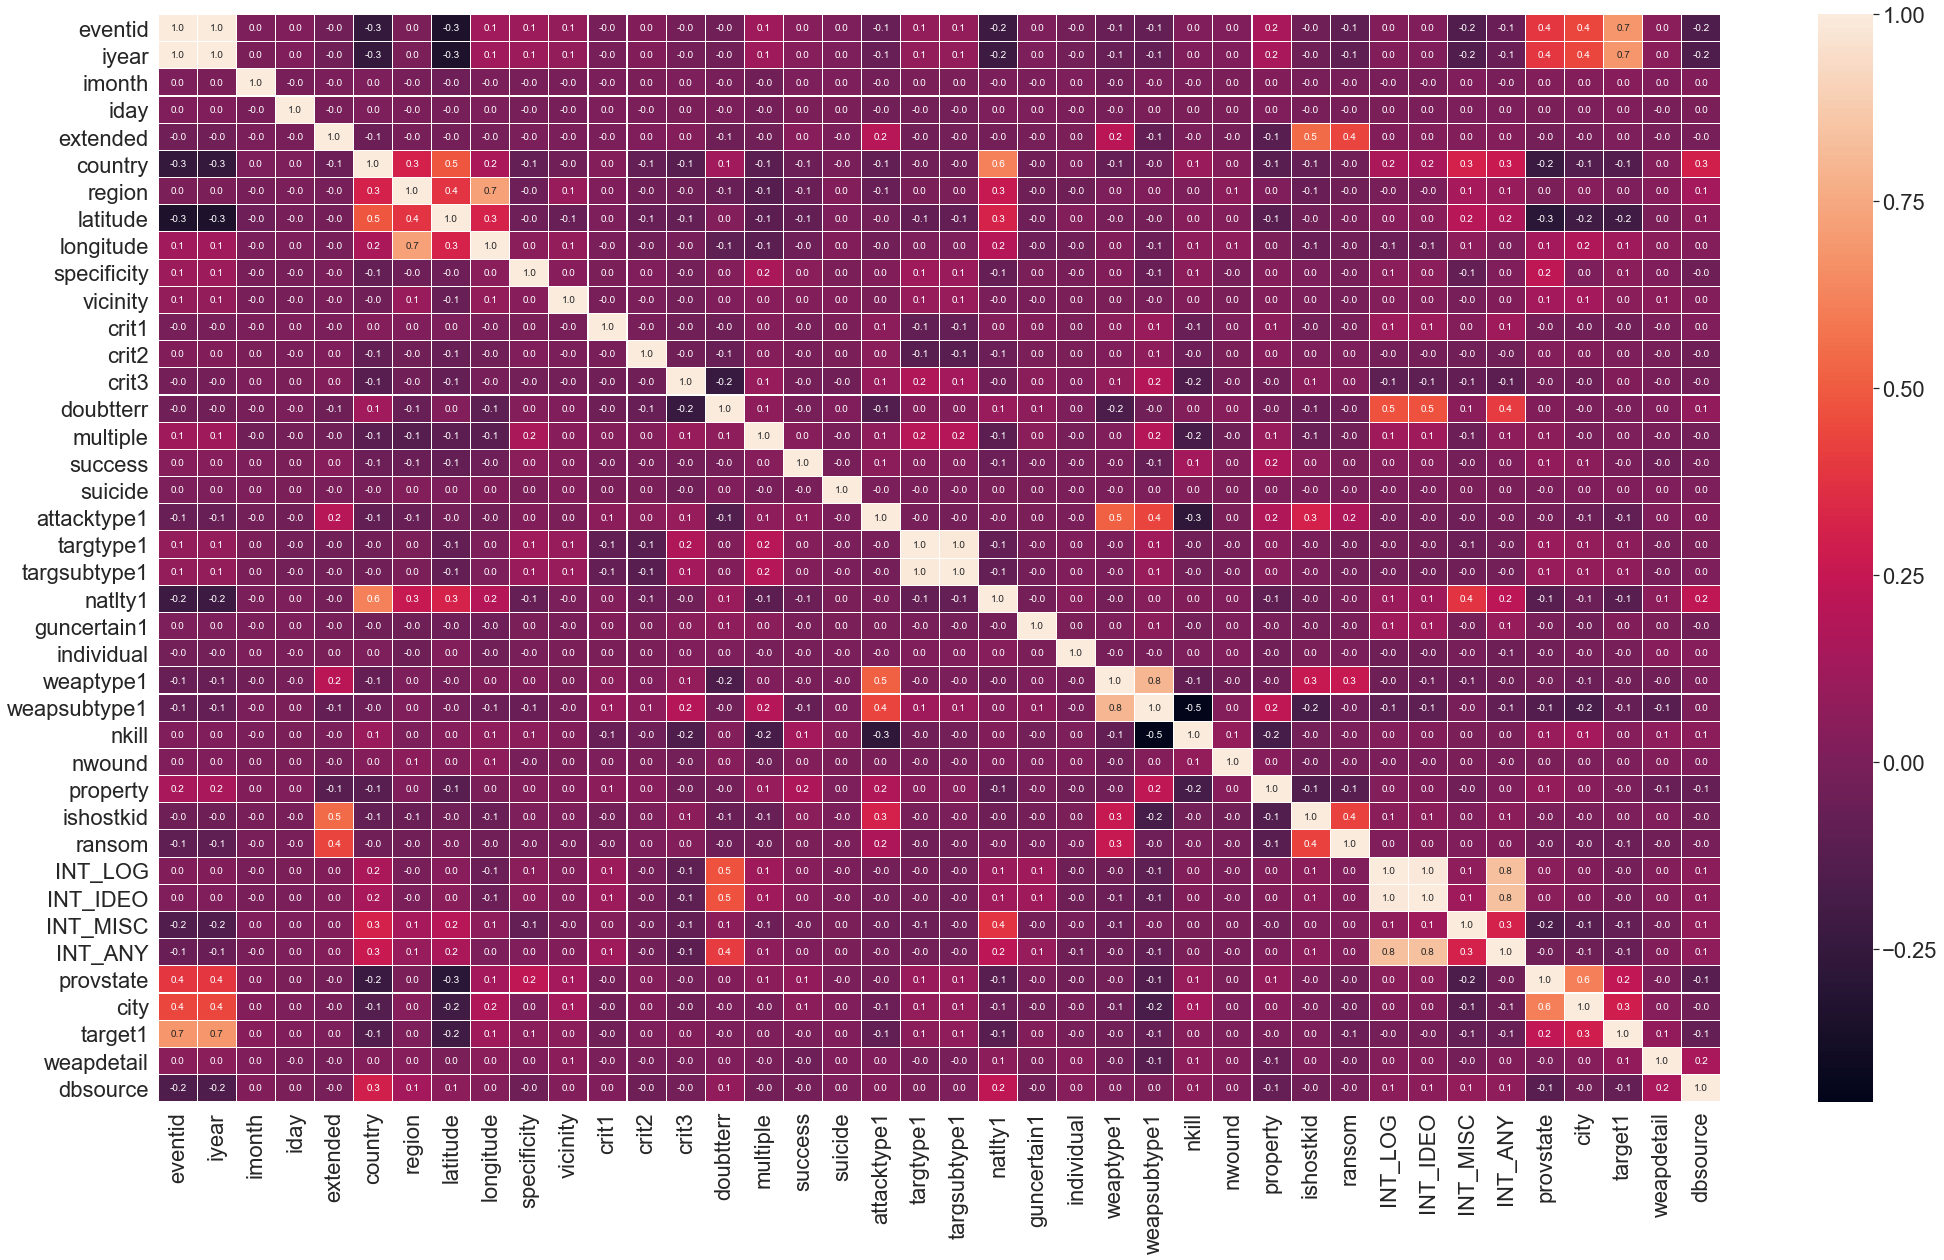

In [32]:
#Concatenate the numerical and categorical features into a new dataframe known as features_correlation1
features_correlation1 = pd.concat([features_new_num, features_new_cat_fact], axis = 1).copy()

# Lets look at the correlation heat map between all the features

f,ax = plt.subplots(figsize=(35, 20))
sns.heatmap(features_correlation1.corr(), annot=True, linewidths=.1, fmt= '.1f',ax=ax)

In [33]:
# Droping one of each correlation pair with correlation > 0.6 from the features_correlation1 dataframe 
# and assigning the results to features_correllation2 variable
features_correlation2 = features_correlation1.drop(['iyear', 'target1', 'weapsubtype1', 'targsubtype1', 'INT_LOG', 'INT_ANY', 'region'], axis = 1)


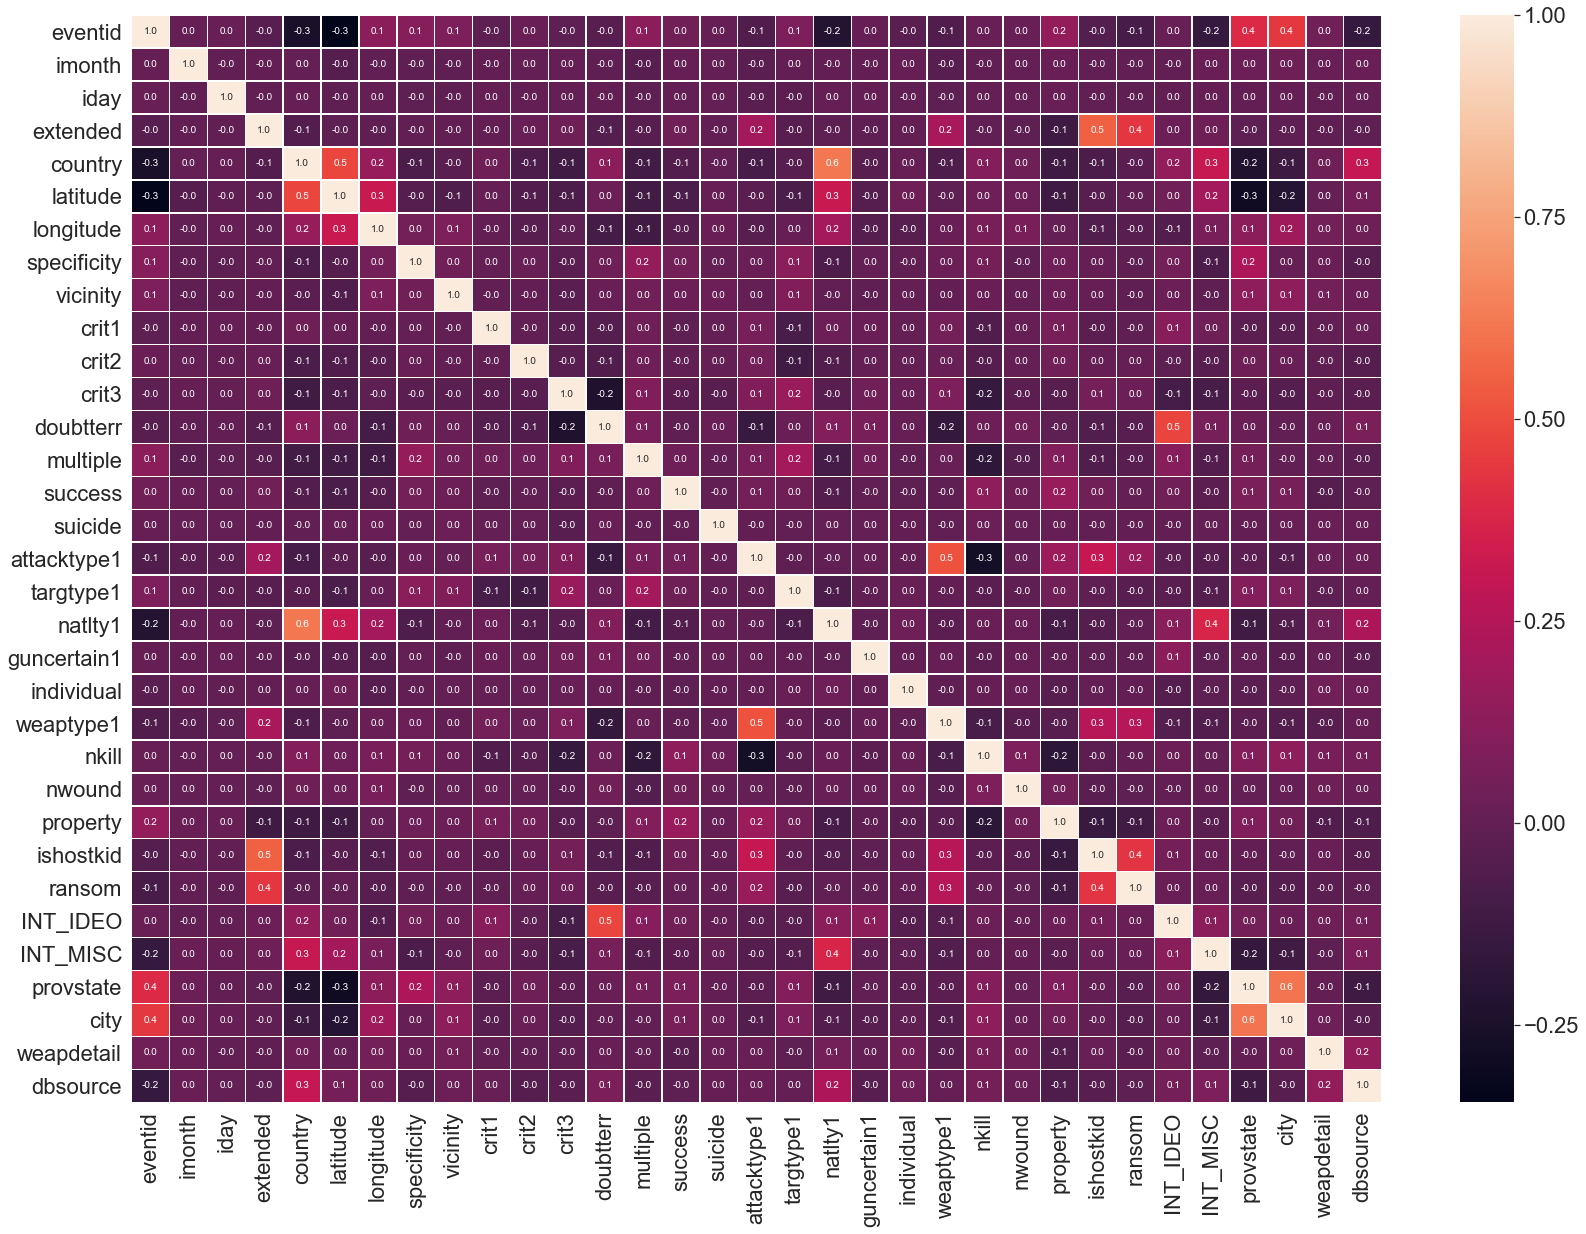

In [34]:
#Check the correlation map for resulting dataframe i.e., features_correlation2 
#correlation map
f,ax = plt.subplots(figsize=(28, 20))
sns.heatmap(features_correlation2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Selection
* We now drop the above dropped features in the collinear analysis from the feature_new dataframe containing the 
  categorical numercal, and unfactorized categorical features.
  
* I am going to also drop all 

* Option for feature engineering, separate dataframe into numerical and categorical, find the log of categorical,   and concatenate it back to the one hot encoded categorical data

In [35]:
features_new = features_new.drop(['iyear', 'target1', 'weapsubtype1', 'targsubtype1', 'INT_LOG', 'INT_ANY', 'region'], axis = 1)

In [36]:
features_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33026 entries, 0 to 44961
Data columns (total 33 columns):
eventid        33026 non-null int64
imonth         33026 non-null int64
iday           33026 non-null int64
extended       33026 non-null int64
country        33026 non-null int64
provstate      32901 non-null object
city           33026 non-null object
latitude       33026 non-null float64
longitude      33026 non-null float64
specificity    33026 non-null float64
vicinity       33026 non-null int64
crit1          33026 non-null int64
crit2          33026 non-null int64
crit3          33026 non-null int64
doubtterr      33026 non-null float64
multiple       33026 non-null float64
success        33026 non-null int64
suicide        33026 non-null int64
attacktype1    33026 non-null int64
targtype1      33026 non-null int64
natlty1        32870 non-null float64
guncertain1    33026 non-null float64
individual     33026 non-null int64
weaptype1      33026 non-null int64
weapdetail 

# Split into training and test set

In [37]:
# Split the data set into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_new, Y, test_size=0.2, shuffle=True, random_state=42)

In [38]:
#X_train.head()   ------correct

### Onehot encode the categorical features

In [39]:
#Onehot encode the X_train and X_test categorical variables

X_train_Onehot=pd.get_dummies(X_train)

X_test_Onehot=pd.get_dummies(X_test)

In [40]:
len(X_train_Onehot.columns)

7331

In [41]:
len(X_test_Onehot.columns)

3109

* After onehot encoding, the features in the test set are different than the ones in the train set.

* This must be fixed, since we need the same number of columns in training and test set

In [42]:
# This code ensures that both training and test sets have the same columns 
# Get missing columns in the training test
missing_cols = set(X_train_Onehot.columns ) - set(X_test_Onehot.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_Onehot[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test_Onehot = X_test_Onehot[X_train_Onehot.columns]

In [43]:
len(X_train_Onehot.columns)

7331

In [44]:
len(X_test_Onehot.columns)

7331

In [45]:
#X_train_Onehot.head()

### Imputing missing values

In [46]:
# use imputation to fill the missing values in the X_train_num
# Create an imputer object with a median filling strategy
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='most_frequent')

# Train on the training features
imputer.fit(X_train_Onehot)

# Transform both training data and testing data
X_train_imp = imputer.transform(X_train_Onehot)
X_test_imp = imputer.transform(X_test_Onehot)

In [47]:
X_train_imp=pd.DataFrame(X_train_imp)

X_train_imp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,...,7264,7265,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330
0,1.984112e+11,11.0,17.0,0.0,160.0,7.083241,125.600998,1.0,0.0,1.0,1.0,1.0,-9.0,0.0,1.0,0.0,1.0,14.0,160.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.985033e+11,3.0,31.0,0.0,45.0,3.418660,-76.241980,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,4.0,45.0,0.0,0.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.982051e+11,5.0,5.0,0.0,61.0,13.738762,-89.054916,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,21.0,61.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.987081e+11,8.0,14.0,0.0,153.0,34.006004,71.537430,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,14.0,153.0,0.0,0.0,6.0,2.0,13.0,1.0,0.0,0.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.989021e+11,2.0,8.0,0.0,186.0,7.293840,80.640669,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,4.0,186.0,0.0,0.0,5.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling 

In [48]:
#Feature scaling of training set.
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

#These must be converted to arrays 
y_train = np.array(y_train)
y_test = np.array(y_test)

# Model training and Evaluation

## Random Forest Classifier

In [50]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_scaled, y_train.ravel())
y_pred = RF_clf.predict(X_train_scaled)
from sklearn.metrics import accuracy_score
print(RF_clf.__class__.__name__, accuracy_score(y_train, y_pred))

RandomForestClassifier 0.993224829674489


#### Evaluating the performance of Random Forest Classifier by Cross-Validation 

In [51]:
# Performing cross validaton to evaluate the model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_clf, X_train_scaled, y_train.ravel(), cv=5, scoring='accuracy')
print('Scores:', scores)

print('Mean:', scores.mean())

print('Standard deviation:',scores.std())

Scores: [0.70508137 0.79039464 0.79770249 0.82619143 0.81781046]
Mean: 0.7874360773256432
Standard deviation: 0.04317645369386935


#### Evaluating the results of the Random Forest Classifier with Confusion Matrix (ultimate performance)

In [52]:

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(RF_clf, X_train_scaled, y_train.ravel(), cv=5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_mat = confusion_matrix(y_train, y_train_pred)
print (confusion_mat)
print ('Report : ')
print (classification_report(y_train, y_train_pred))   # target_names = Y.unique() 
end = time.time()
print('Time spent in creating model (minutes): ' , (end-start)/60)

[[   0    0    0 ...    0    0    0]
 [   0   22    2 ...    0    0    0]
 [   0    0 7990 ...    0    0    0]
 ...
 [   0    0    1 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]]
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.85      0.69        26
           2       0.80      0.98      0.88      8172
           3       0.50      0.55      0.53        74
           4       0.88      1.00      0.93        28
           5       0.00      0.00      0.00         3
           6       0.29      0.29      0.29        35
           7       0.53      0.66      0.59       130
           8       0.57      0.67      0.62        12
           9       0.71      0.48      0.57        21
          10       0.32      0.29      0.30        63
          11       0.53      0.43      0.47        54
          13       0.81      0.92      0.86       376
     

## Decision Tree Classifier

In [53]:
## Train Model with a decision tree classifier
start = time.time()
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train_scaled, y_train.ravel())
y_pred = DT_clf.predict(X_train_scaled)
from sklearn.metrics import accuracy_score
print(DT_clf.__class__.__name__, accuracy_score(y_train, y_pred))

DecisionTreeClassifier 0.9995457986373959


#### Evaluating the performance of Decision Tree Classifier by Cross Validation

In [54]:
# Performing cross validaton to evaluat the model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT_clf, X_train_scaled, y_train.ravel(), cv=5, scoring='accuracy')
print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard deviation:',scores.std())


Scores: [0.73032215 0.80882353 0.82515576 0.8444133  0.83619281]
Mean: 0.8089815102346473
Standard deviation: 0.04109693988152699


#### Evaluating the results of the Decision Tree Classifier with Confusion Matrix (ultimate performance)

In [55]:
# Evaluation the performance of classifier with Confusion matrix (ultimate performance classifier)
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(DT_clf, X_train_scaled, y_train.ravel(), cv=5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_mat=confusion_matrix(y_train, y_train_pred)

print (confusion_mat)
print ('Report : ')
print (classification_report(y_train, y_train_pred))   # target_names = Y.unique() 
end = time.time()
print('Time spent in creating model (minutes): ' , (end-start)/60)

[[   0    0    0 ...    0    0    0]
 [   0   23    0 ...    0    0    0]
 [   0    0 7810 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.68      0.88      0.77        26
           2       0.94      0.96      0.95      8172
           3       0.58      0.61      0.59        74
           4       0.97      1.00      0.98        28
           5       1.00      0.67      0.80         3
           6       0.32      0.34      0.33        35
           7       0.67      0.72      0.70       130
           8       0.67      0.67      0.67        12
           9       0.33      0.24      0.28        21
          10       0.62      0.68      0.65        63
          11       0.46      0.43      0.44        54
          13       0.95      0.94      0.95       376
     

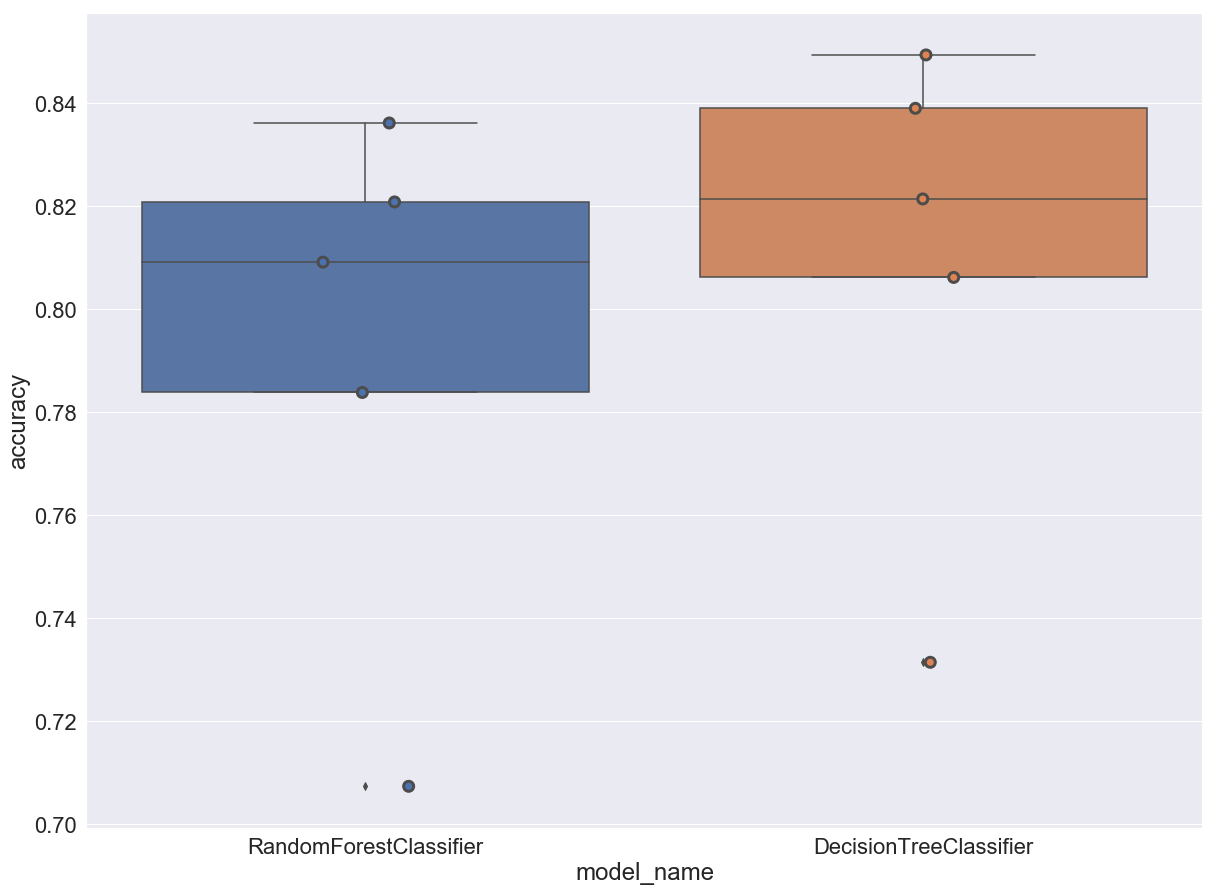

In [57]:
models =[RF_clf, DT_clf]
from sklearn.model_selection import cross_val_score
cv=5

cv_df = pd.DataFrame(index=range(cv * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

fig, ax = plt.subplots(figsize=(20,15))

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=3)
plt.show()

# Model Selection

* While the Decision Tree classifier has a slightly higher accuracy than the Random Forest classifier, the         difference between them is insignificant.

* The time it takes to train the data set with a random forest classifier is slightly shorter than the decision     tree classifier.

* For this project I am selecing the Random Forest for further tuning, since it has a shorter prediction time
  Decicion tree classifiers

#### Model hyperparameter tuning on the Random Forest Classifier

In [138]:
from sklearn.model_selection import RandomizedSearchCV

# specify parameter distributions

param_dist = {"n_estimators": [10, 200],
              "min_samples_leaf": [1,10],
              "bootstrap": [True, False],
              "n_jobs": [-1]
             }


In [52]:
# n_iter controls the number of searches, the higher the value, the longer the time and the better the search
rand = RandomizedSearchCV(RF_clf, param_dist, n_iter=4, cv=5, scoring='accuracy', random_state=5)

In [53]:
rand.fit(X_train_scaled, y_train.ravel())
results = pd.DataFrame(rand.cv_results_)


In [54]:
#Print the results of the randomizedgrid search 
results.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_estimators,param_min_samples_leaf,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.904550,1.443861,2.326031,0.415720,-1,200,10,False,"{'n_jobs': -1, 'n_estimators': 200, 'min_sampl...",0.404578,0.478371,0.510282,0.518125,0.532684,0.484231,0.047751,3,0.509566,0.487109,0.485193,0.479542,0.473458,0.486974,0.012260
1,4.835018,1.729082,0.238323,0.052894,-1,10,10,True,"{'n_jobs': -1, 'n_estimators': 10, 'min_sample...",0.401485,0.498558,0.471059,0.535067,0.513601,0.479756,0.048121,4,0.505913,0.514365,0.450127,0.489546,0.458330,0.483656,0.025451
2,44.064970,12.296475,0.330895,0.051951,-1,10,1,False,"{'n_jobs': -1, 'n_estimators': 10, 'min_sample...",0.659449,0.759913,0.787129,0.813239,0.818920,0.761919,0.060748,2,0.999135,0.999448,0.999092,0.998919,0.998926,0.999104,0.000192
3,2187.452546,3151.387534,4.794583,1.351540,-1,200,1,True,"{'n_jobs': -1, 'n_estimators': 200, 'min_sampl...",0.683885,0.790555,0.810739,0.839243,0.842875,0.787663,0.060861,1,0.999135,0.999448,0.999092,0.998919,0.998926,0.999104,0.000192


In [55]:
#Find the best parameters from the randomsearch iteration
rand.best_params_

{'n_jobs': -1, 'n_estimators': 200, 'min_samples_leaf': 1, 'bootstrap': True}

In [56]:
# Test the best parameters on the RandomForestClassifier
RF_clf=RandomForestClassifier(n_jobs = -1, n_estimators = 200, min_samples_leaf=1, bootstrap=True)

RF_clf.fit(X_train_scaled, y_train.ravel())
y_pred = RF_clf.predict(X_train_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(RF_clf.__class__.__name__, accuracy_score(y_train, y_pred))


RandomForestClassifier 0.9995457986373959


# Evaluate model on test set 

In [57]:
## Train Model with a random forest classifier
start = time.time()
y_pred = RF_clf.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(RF_clf.__class__.__name__, accuracy_score(y_test, y_pred))


Precision = precision_score(y_test, y_pred, average='micro')
Recall = recall_score(y_test, y_pred, average='micro')
F1_Score = f1_score(y_test, y_pred, average='micro')

print('Precision:', Precision)
print('Recall:', Recall)
print('F1 score:', F1_Score)

end = time.time()
print('Time spent in creating model(minutes): ', (end-start)/60)

RandomForestClassifier 0.8198607326672722
Precision: 0.8198607326672722
Recall: 0.8198607326672722
F1 score: 0.8198607326672722
Time spent in creating model(minutes):  0.38149569829305013


# Model Interpretation 

#### feature importance

In [58]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(X_train_Onehot.columns), 
                                'importance': RF_clf.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head()

,feature,importance
0,INT_IDEO,0.126314
1,eventid,0.065297
2,latitude,0.049146
3,iday,0.044624
4,longitude,0.042979


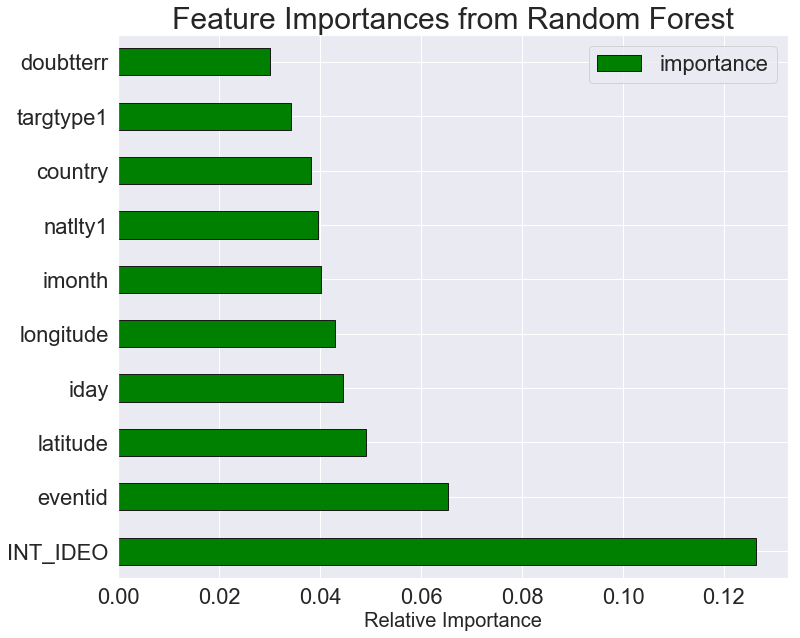

In [59]:
from IPython.core.pylabtools import figsize
figsize(12, 10)
#plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'green');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

# Conclusions

Summary
1. The most important variable for predicting a terrorist act is their international Ideology (INT_IDEO)             followed by the event ID (eventid)

2. The model is capable of predicting group responsible for any terrorist activity by an accuracy of 82% on a        new data 
 

# Saving Model and Use Later

In [ ]:
# Saving model with joblib or pickle

import pickle

# save the model to disk
filename = 'GTD.sav'
pickle.dump(RF_clf, open(filename, 'wb'))



## some time later...
 
## load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)



#---------------------------------------------------------
# using joblib

# save the model to disk
filename = 'GTD.sav'
joblib.dump(RF_clf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

# Notes on Precision, Recall, and F1 Score:

For micro averaging of precision, recall, and F1 Score, the value are always the same.
A micro-average will aggregate the contributions of all classes to compute the average metric.
In a multi-class classification, micro-averaging is preferable if you suspect there might be a class imbalance(i.e
if you suspect there will be many more examples of one class than of other classes)

A macro average will compute the metric independently for each class, and then take the average (hence treating all classes equally)

Example: A:1 TP and 1 FP                 TP(True positive), FP(False positive)
         B:10 TP and 90 FP
         C:1 TP and 1 FP
         D:1 TP and 1 FP

Precision for A, C, and D are the same i.e 1/2, or 0.5, however, Precision for B is 10/100, or 0.1

Micro-Precision = (1+10+1+1)/(2+100+2+2) = 0.123

Macro-Precision = (0.5+0.5+0.5+0.1)/4 = 0.4


SOURCE: Datascience.stackexchange



# Acknowledgement

Hands-On Machine Learning With Scikit-Learn & TensorFlow (Aurelien Geron)

Machine-learning-project-walkthrough (github repository of Will Koehrsen)

Artificial Intelligence with Python (Prateek Joshi)

Learning Python (Mark Lutz)

Several articles on medium, and posts on Quora and stackexchange

Thibault Clement: (Stackoverflow)

scikit-learn.org

Multi-Class Text Classification with Scikit-Learn (Towards Data Science: Susan Li) 